In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras import layers, losses
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

In [2]:
import random

In [3]:
import requests
import matplotlib.pyplot as plt
from requests.packages.urllib3.exceptions import InsecureRequestWarning
from tensorflow.keras.datasets import fashion_mnist

# Suppress SSL certificate verification warnings
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# Make your request
response = requests.get('https://example.com', verify=False)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# class Autoencoder(Model):
#     def __init__(self, latent_dim):
#         super(Autoencoder, self).__init__()
#         self.latent_dim = latent_dim
#         self.encoder = tf.keras.Sequential([
#             layers.Flatten(),
#             layers.Dense(512, activation='relu'),
#             layers.Dense(256, activation='relu'),
#             layers.Dense(128, activation='relu'),
#             layers.Dense(latent_dim, activation='relu')
#         ])
#         self.decoder = tf.keras.Sequential([
#             layers.Dense(128, activation='relu'),
#             layers.Dense(256, activation='relu'),
#             layers.Dense(512, activation='relu'),
#             layers.Dense(128*128, activation='relu'),
#             layers.Reshape((128, 128)),
#         ])

#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

In [25]:
print(trainF.shape)

(4344, 128, 128)


In [26]:
trainF = np.expand_dims(trainF, axis=-1)  # Add a channel dimension
print(trainF.shape)  # This should print (4344, 128, 128, 1)

(4344, 128, 128, 1)


In [27]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(128, 128, 1)),  # Changed to 1 channel
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(8*8*128, activation='relu'),
            layers.Reshape((8, 8, 128)),
            layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(1, (3, 3), strides=2, activation='sigmoid', padding='same')  # Output one channel
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2
import numpy as np

# Function to load images from a folder and convert them to arrays
def load_images_as_arrays(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        img = img.resize((128, 128), Image.ANTIALIAS)
        if img is not None:
            img_array = np.array(img)
            images.append(img_array)

    grayscale_images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])
    return grayscale_images

# Load images from the specified folders and convert them into arrays
train_faces = load_images_as_arrays("/content/drive/MyDrive/abroad/NN/Split images/TrainF")
train_avatars = load_images_as_arrays("/content/drive/MyDrive/abroad/NN/Split images/TrainA")
test_faces = load_images_as_arrays("/content/drive/MyDrive/abroad/NN/Split images/TestF")
test_avatars = load_images_as_arrays("/content/drive/MyDrive/abroad/NN/Split images/TestA")

# Shuffle the arrays
np.random.shuffle(train_faces)
np.random.shuffle(train_avatars)
np.random.shuffle(test_faces)
np.random.shuffle(test_avatars)


<ipython-input-6-6ef262f1286f>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


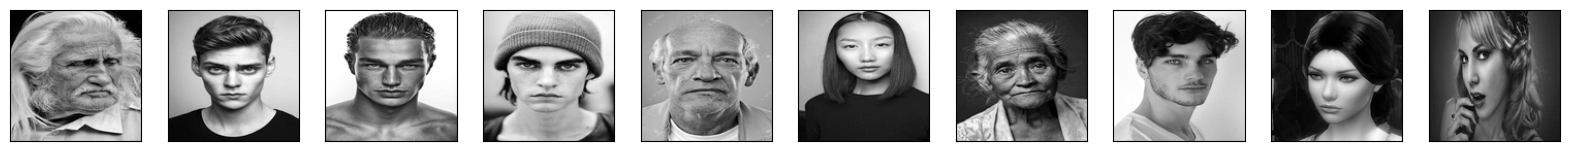

In [28]:
trainF = train_faces.astype('float32') / 255.
testF = test_faces.astype('float32') / 255.

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(trainF[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [29]:
trainF = np.expand_dims(trainF, axis=-1)
input_shape = trainF.shape[1:]

trainF = train_faces.astype('float32') / 255.
testF = test_faces.astype('float32') / 255.

autoencoder = Autoencoder(latent_dim = 500)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(trainF, trainF,
                epochs=10,
                shuffle=True,
                validation_data=(testF, testF))

Epoch 1/10
136/136 [==============================] - 109s 783ms/step - loss: 0.0508 - val_loss: 0.0255
Epoch 2/10
136/136 [==============================] - 104s 764ms/step - loss: 0.0209 - val_loss: 0.0183
Epoch 3/10
136/136 [==============================] - 104s 764ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 4/10
136/136 [==============================] - 103s 756ms/step - loss: 0.0130 - val_loss: 0.0129
Epoch 5/10
136/136 [==============================] - 102s 749ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 6/10
136/136 [==============================] - 102s 749ms/step - loss: 0.0100 - val_loss: 0.0102
Epoch 7/10
136/136 [==============================] - 102s 749ms/step - loss: 0.0092 - val_loss: 0.0095
Epoch 8/10
136/136 [==============================] - 105s 769ms/step - loss: 0.0081 - val_loss: 0.0088
Epoch 9/10
136/136 [==============================] - 104s 762ms/step - loss: 0.0076 - val_loss: 0.0083
Epoch 10/10
136/136 [==============================] - 104s 765m

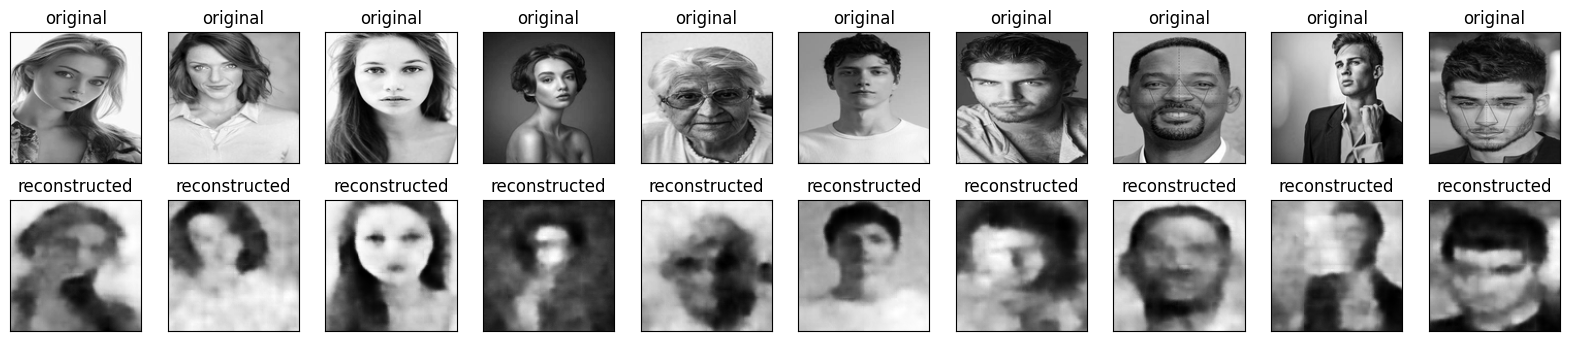

In [30]:
# Visualization cell
encoded_imgs = autoencoder.encoder(testF).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(testF[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

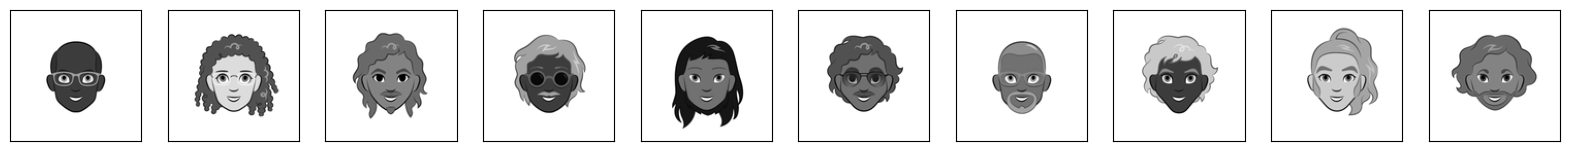

In [31]:
trainA = train_avatars.astype('float32') / 255.
testA = test_avatars.astype('float32') / 255.

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(trainA[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [32]:
autoencoder = Autoencoder(latent_dim = 500)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(trainA, trainA,
                epochs=10,
                shuffle=True,
                validation_data=(testA, testA))

Epoch 1/10
251/251 [==============================] - 189s 747ms/step - loss: 0.0227 - val_loss: 0.0082
Epoch 2/10
251/251 [==============================] - 188s 749ms/step - loss: 0.0058 - val_loss: 0.0044
Epoch 3/10
251/251 [==============================] - 188s 748ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 4/10
251/251 [==============================] - 190s 757ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 5/10
251/251 [==============================] - 190s 756ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 6/10
251/251 [==============================] - 189s 753ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/10
251/251 [==============================] - 193s 768ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/10
251/251 [==============================] - 193s 768ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/10
251/251 [==============================] - 193s 770ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/10
251/251 [==============================] - 194s 772m

In [33]:
print( history.history['val_loss'][-1] )

0.0015363116981461644


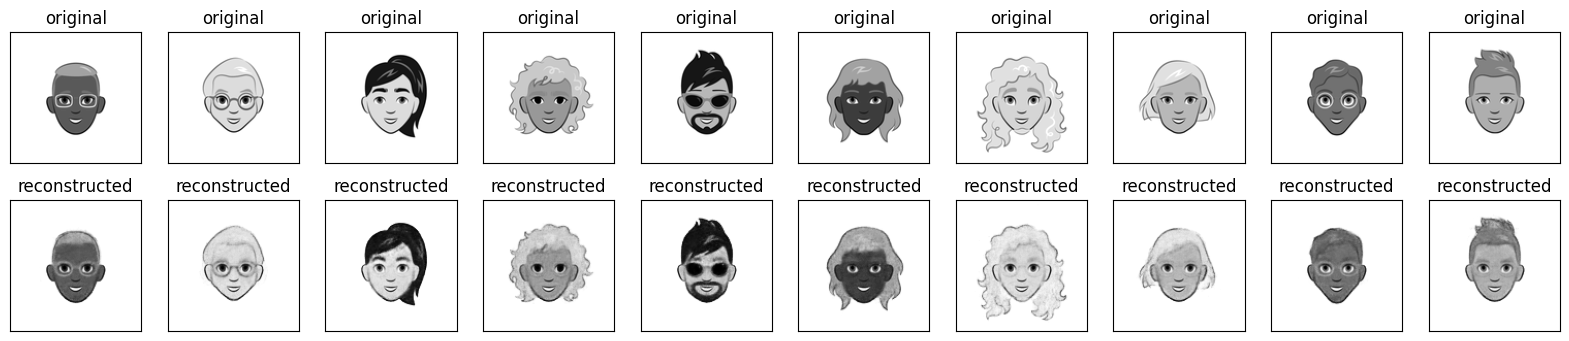

In [34]:
# Visualization cell
encoded_imgs = autoencoder.encoder(testA).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(testA[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [35]:
encoded_img = autoencoder.encoder(testA[random.randint(0, 2000)])

ValueError: Exception encountered when calling layer 'sequential_14' (type Sequential).

Input 0 of layer "conv2d_15" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (128, 128)

Call arguments received by layer 'sequential_14' (type Sequential):
  • inputs=tf.Tensor(shape=(128, 128), dtype=float32)
  • training=None
  • mask=None